In [98]:
############################################################################################################################
# The program is created and developed in juipter notebook by Alex Hillary(ST10081698)
# The Dataset is called Reviews.csv and can be accessed: https://www.kaggle.com/datasets/bhavikardeshna/amazon-customerreviews-polarity?resource=download&select=test.csv
# The Dataset is made of 3 columns (Review title, review content and review ID)
# For Review ID 2 represents a good review and 1 represents a bad review
# For Review Content is just a more in depth explanation of the review
# The application was developed in Jupyter Notebook version 6.5.4

#Imports 
# pandas is used for data manipulation and analysis
import pandas as pd

In [99]:
# Define column names
column_names = ["Review ID", "Review Title", "Review Content"]
#loads the data from excel into a dataframe 
df = pd.read_csv('Reviews.csv', header=None, names=column_names)
df.head()

,Review ID,Review Title,Review Content
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [100]:
 #print the shape dataset to see how many rows and columns there are
    
print("Shape The DataSet ", df.shape )

Shape The DataSet  (400000, 3)


In [101]:
#Checking the datatypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Review ID       400000 non-null  int64 
 1   Review Title    399976 non-null  object
 2   Review Content  400000 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.2+ MB


In [102]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Review ID          0
Review Title      24
Review Content     0
dtype: int64


In [103]:
# Since the dataset is quite large i have decided to drop the 24 rows
# Drop rows with missing values in 'Review Title'
df = df.dropna(subset=['Review Title'])


In [104]:
df.head()

,Review ID,Review Title,Review Content
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [105]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Review ID         0
Review Title      0
Review Content    0
dtype: int64


In [106]:
# ok now that the datsframe has no missing values i will proceed with cleaning the text data 
# The cleaning if the text data will involve removing of any extra white spaces, converting text to lowercase for uniformity,
# removing numbers, punctuation and etc
# Import necessary libraries for text preprocessing
import re
import string

# Function to clean text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove whitespace
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text

# Aplying the clean_text function to the 'Review Content' column as a new column in the dataframe as im unsure if i should drop Review Title 
# As i may need it for additional analysis later on
df['Cleaned Review Content'] = df['Review Content'].apply(clean_text)

In [107]:
# Display the first few rows to see the cleaned text
print("First few rows of the dataset with cleaned text:")
print(df[['Review Content', 'Cleaned Review Content']].head())

First few rows of the dataset with cleaned text:
                                      Review Content  \
0  My lovely Pat has one of the GREAT voices of h...   
1  Despite the fact that I have only played a sma...   
2  I bought this charger in Jul 2003 and it worke...   
3  Check out Maha Energy's website. Their Powerex...   
4  Reviewed quite a bit of the combo players and ...   

                              Cleaned Review Content  
0  my lovely pat has one of the great voices of h...  
1  despite the fact that i have only played a sma...  
2  i bought this charger in jul and it worked ok ...  
3  check out maha energys website their powerex m...  
4  reviewed quite a bit of the combo players and ...  


In [108]:
# Now that the text has been cleaned i will move on to convert the cleaned text data into numerical features using TF-IDF

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [110]:
collection_CD = df['Cleaned Review Content'].tolist()  # Collection of cleaned review texts
target = (df['Review ID'] == 2).astype(int)  # Binary target: 1 for positive (Review ID = 2), 0 for negative (Review ID = 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(collection_CD, target, test_size=0.2, random_state=42)


In [111]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(collection_CD, target, test_size=0.2, random_state=42)

In [112]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  

In [113]:
# I decided to go with Logistic Regression as the model for evaluation as it ss straightforward to implement, interpretable
# and and works well with binary classification tasks like sentiment analysis
from sklearn.linear_model import LogisticRegression
# Initialize Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)

In [114]:
# Created a pipeline with TF-IDF vectorization and classifier
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer), # Step 1
    ('clf', classifier) # Step 2
])

In [115]:
# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

In [116]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     40010
           1       0.87      0.87      0.87     39986

    accuracy                           0.87     79996
   macro avg       0.87      0.87      0.87     79996
weighted avg       0.87      0.87      0.87     79996



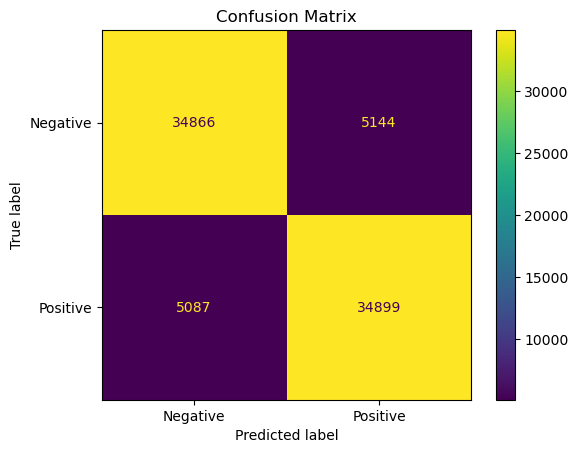

In [117]:
# matplotlib and seaborn are used for plotting and visualization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()


In [118]:
# Based on the graph i can see 34866 as the true negatives that correctly predicted as negative by the model
# The 34899 as the true positives that correctly predicted as positive by the model
# And 5087 (negative) and 5144 (positive) as incorrectly predicted 

In [119]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_prob)

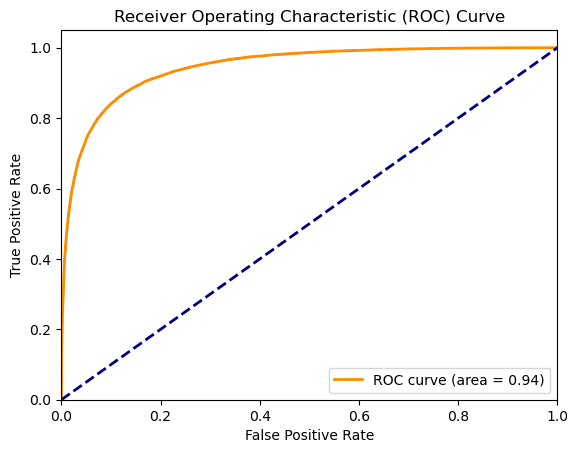

In [120]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [121]:
# BAsed on the graph i can see that the model is highly able to distinguish between positive and negative reviews

In [122]:
# Im going to implement Lemmatization to reduces words(Cleaned Review Content) to their base or dictionary form
# to see if it will improve the model

In [123]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt') # used by for tokenizing sentences and words
nltk.download('wordnet') # lexical database.essetialy is just a database of words which i will use to perform lemmatization  

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [124]:
# The lemmatize_text function takes a string of text and the tokenizes it into individual words, 
# where each word is changed to its base form and then joins the words (lemitized) back into a single string. 

# The function to lemmatize text
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# I am applying the function to the cleaned review content and will be a new column in the dataframe
df['Lemmatized Review Content'] = df['Cleaned Review Content'].apply(lemmatize_text)

In [125]:
df.head()

,Review ID,Review Title,Review Content,Cleaned Review Content,Lemmatized Review Content
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...,my lovely pat has one of the great voices of h...,my lovely pat ha one of the great voice of her...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,despite the fact that i have only played a sma...,despite the fact that i have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,i bought this charger in jul and it worked ok ...,i bought this charger in jul and it worked ok ...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,check out maha energys website their powerex m...,check out maha energy website their powerex mh...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,reviewed quite a bit of the combo players and ...,reviewed quite a bit of the combo player and w...


In [126]:
# ok now I will try re-training the model using the lemmatized text data

In [127]:
# Convert the lemmatized text data to TF-IDF features whereas previsoulsy i done it on the cleaned text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_lemmatized = tfidf_vectorizer.fit_transform(df['Lemmatized Review Content'])

# Target variable
y = (df['Review ID'] == 2).astype(int)  # Binary target: 1 for positive (Review ID = 2), 0 for negative (Review ID = 1)

In [128]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_lemmatized, y, test_size=0.2, random_state=42)

In [129]:
# Define the pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])


In [130]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['Lemmatized Review Content'], y, test_size=0.2, random_state=42)

In [131]:

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

In [132]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8705435271763589
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     40010
           1       0.87      0.87      0.87     39986

    accuracy                           0.87     79996
   macro avg       0.87      0.87      0.87     79996
weighted avg       0.87      0.87      0.87     79996

Confusion Matrix:
[[34810  5200]
 [ 5156 34830]]


In [133]:
# Based on those accrucary scores. its basically the exact same accuracy compaired to when the model was just trained on the 
# Cleaned Reviewed Content. I guess maybe most of the text was already in their base form so that could be why the model's
# performance was not significantly impacted
# Im now going to try different models to evaluate the performance

In [134]:
# Im now going to see how SVM performs
# i tried svm but was taking to long to run so decided to go with LinearSV as it is alternatively less strenuous on my laptop

from sklearn.svm import LinearSVC

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['Lemmatized Review Content'], (df['Review ID'] == 2).astype(int), test_size=0.2, random_state=42)

# The vectorizer and the LinearSVC classifier
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Unigrams and bigrams
linear_svc = LinearSVC()

In [135]:
# Creating another pipeline
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('clf', linear_svc)
])

# Train the model
pipeline.fit(X_train, y_train)

C:\Users\alexl\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', LinearSVC())])

In [136]:
import pickle
# Saving the pipeline
with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("Pipeline saved successfully!")

Pipeline saved successfully!


In [137]:
# Make predictions
y_pred = pipeline.predict(X_test)
# I used a decision function becuase by default Linear SCV does not provide probability esitimates
y_decision = pipeline.decision_function(X_test)


Accuracy: 0.9111830591529576
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     40010
           1       0.91      0.91      0.91     39986

    accuracy                           0.91     79996
   macro avg       0.91      0.91      0.91     79996
weighted avg       0.91      0.91      0.91     79996



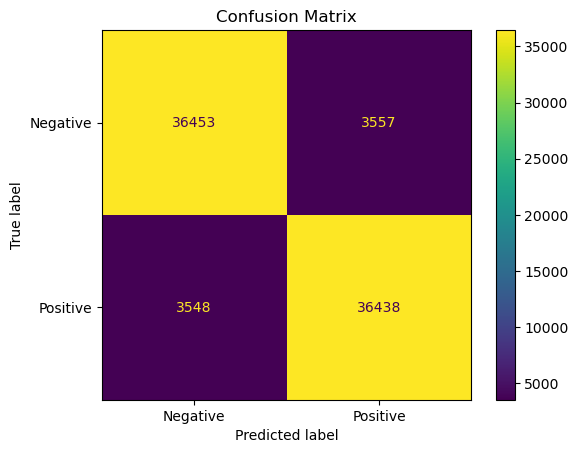

In [138]:
# Evaluate the model
print("Accuracy:", pipeline.score(X_test, y_test))
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [139]:
# Ok based on these results i can see that the LinearSVC is performing better than the logistic regression model 
# As more true positive and negative review are correctly predicted by the model and fewer incorrect positive and negative 
# compaired to the logistic regression model

In [140]:
# now for further evaluation i want to see the ROC AUC score to see how the model's ability to distinguish between
# positive and negative classes
print("ROC AUC Score:", roc_auc_score(y_test, y_decision))

ROC AUC Score: 0.9697652213765946


In [141]:
# Loading the saved model to run a sentiment prediction to allow the user to enter a phrase and the model will evaluate 
# Wheather the phrase(review) is positive or negative

In [146]:
import pickle

# Load the saved pipeline
with open('pipeline.pkl', 'rb') as f:
    pipeline = pickle.load(f)

# Created a function to predict sentiment
def predict_sentiment(review_text):
    prediction = pipeline.predict([review_text])
    return 'Positive' if prediction == 1 else 'Negative'

# Please sir enter an input a phrase
phrase = input("Enter a review phrase: ")
sentiment = predict_sentiment(phrase)
print(f"The review is {sentiment}")



Enter a review phrase: The phone was an excellent purchase
The review is Positive
